In [48]:
import sys
sys.path.append("./../")
import matplotlib.pyplot as plt
#from getdist import plots, MCSamples
import numpy as np
import emcee
import zeus
print('zeus version:', zeus.__version__)

zeus version: 0.9.7


In [185]:
ndim = 10
nwalkers = 2 * ndim * 2
nsteps = 1000

def logprior(x):
    if -4.0 <= x[0] <= 4.0 and np.all(x[1:]<=30) and np.all(x[1:]>=-30):
        return 0.0
    else:
        return -np.inf

def loglikelihood(x):
    a = 3.0
    b = 0.5
    first = -0.5*(x[0]**2.0 / a**2.0) + np.log(1.0/np.sqrt(2.0 * np.pi) * a)
    rest = -0.5*np.sum(x[1:]**2.0 / np.exp(2*b*x[0])) + np.log(1.0/np.sqrt(2.0 * np.pi) *(ndim-1) * np.exp(b* x[0]) )
    return first + rest

def logp(x):
    return loglikelihood(x) #+ logprior(x)

start = 0.1 * np.random.randn(nwalkers,ndim)

In [186]:
sampler = zeus.sampler(logp, nwalkers, ndim, jump=0.0)
sampler.run(start, nsteps)

Initialising ensemble of 40 walkers...
Sampling progress : 100%|██████████| 1000/1000 [00:03<00:00, 252.19it/s]


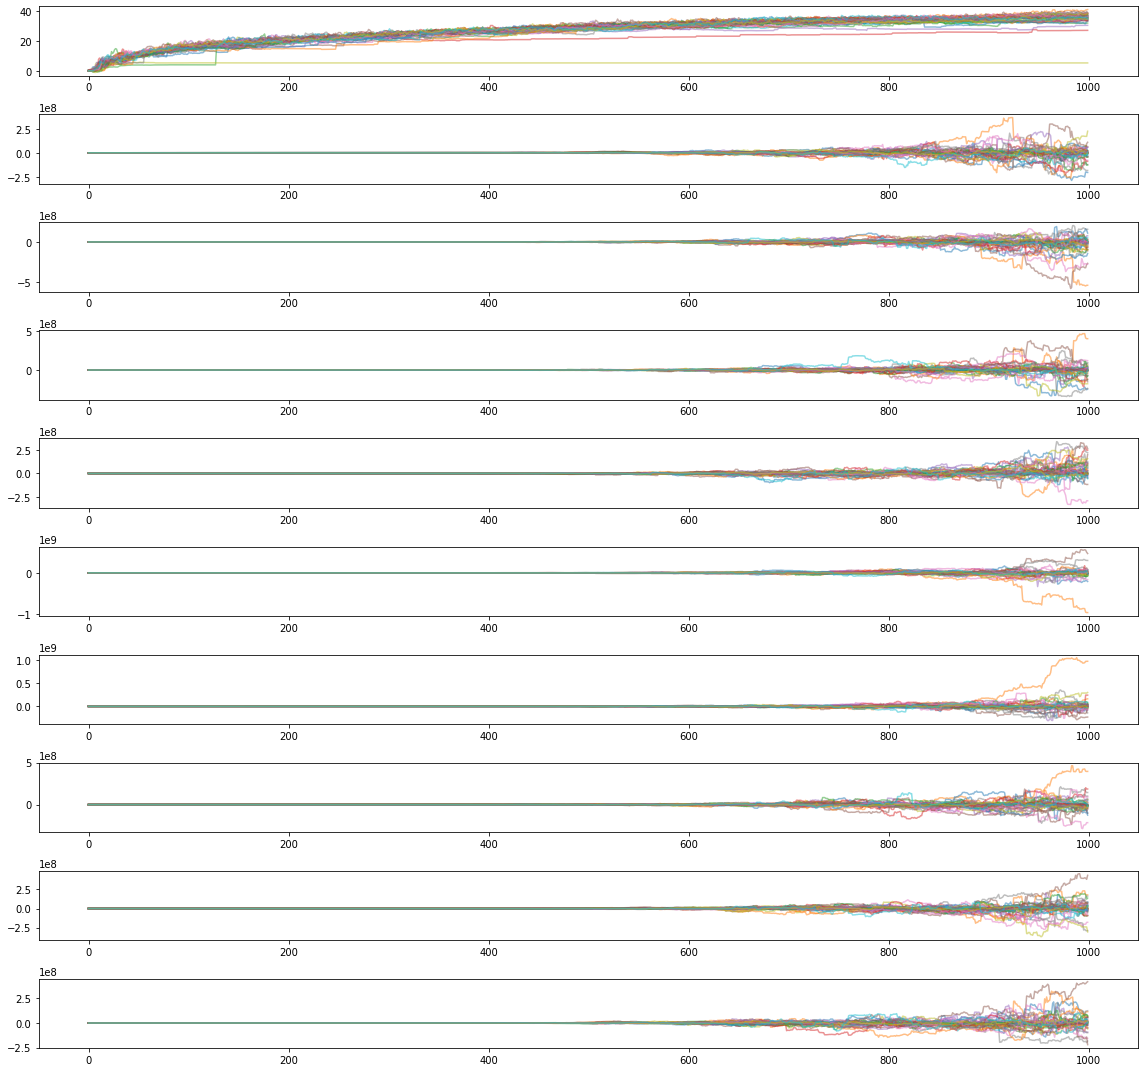

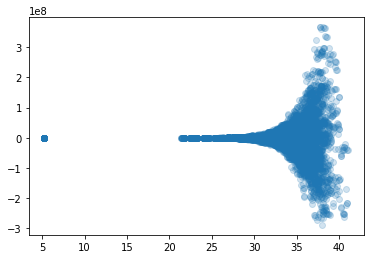

Summary
-------
Number of Generations: 1000
Number of Parameters: 10
Number of Walkers: 40
Mean Integrated Autocorrelation Time: 30.17
Effective Sample Size: 1325.7
Number of Log Probability Evaluations: 134804.0
Effective Samples per Log Probability Evaluation: 0.009834


MCMC mean: [ 3.20808919e+01 -1.36356974e+06 -4.30737418e+06  1.32386282e+06
  3.83610895e+06 -3.07808970e+06  3.19103119e+06 -6.48343546e+05
 -2.10862030e+06 -5.96470686e+05]
MCMC std: [5.14862848e+00 3.83766945e+07 4.51139612e+07 4.27554570e+07
 3.63617606e+07 5.87348050e+07 6.03202772e+07 3.64798011e+07
 4.20772986e+07 3.88782892e+07]


In [187]:
plt.figure(figsize=(16,1.5*ndim))
for n in range(ndim):
    plt.subplot2grid((ndim, 1), (n, 0))
    plt.plot(np.arange(nsteps),sampler.chain[:,:,n].T,alpha=0.5)
plt.tight_layout()
plt.show()

trace = sampler.flatten(burn=int(nsteps/2))
plt.scatter(trace[:,0],trace[:,1], alpha=0.2)
plt.show()

print('MCMC mean:', np.mean(trace, axis=0))
print('MCMC std:', np.std(trace, axis=0))

sampler.summary

In [177]:
sampler_emcee = emcee.EnsembleSampler(nwalkers,ndim,logp)
sampler_emcee.run_mcmc(start,nsteps, progress=True);

100%|██████████| 1000/1000 [00:02<00:00, 394.04it/s]


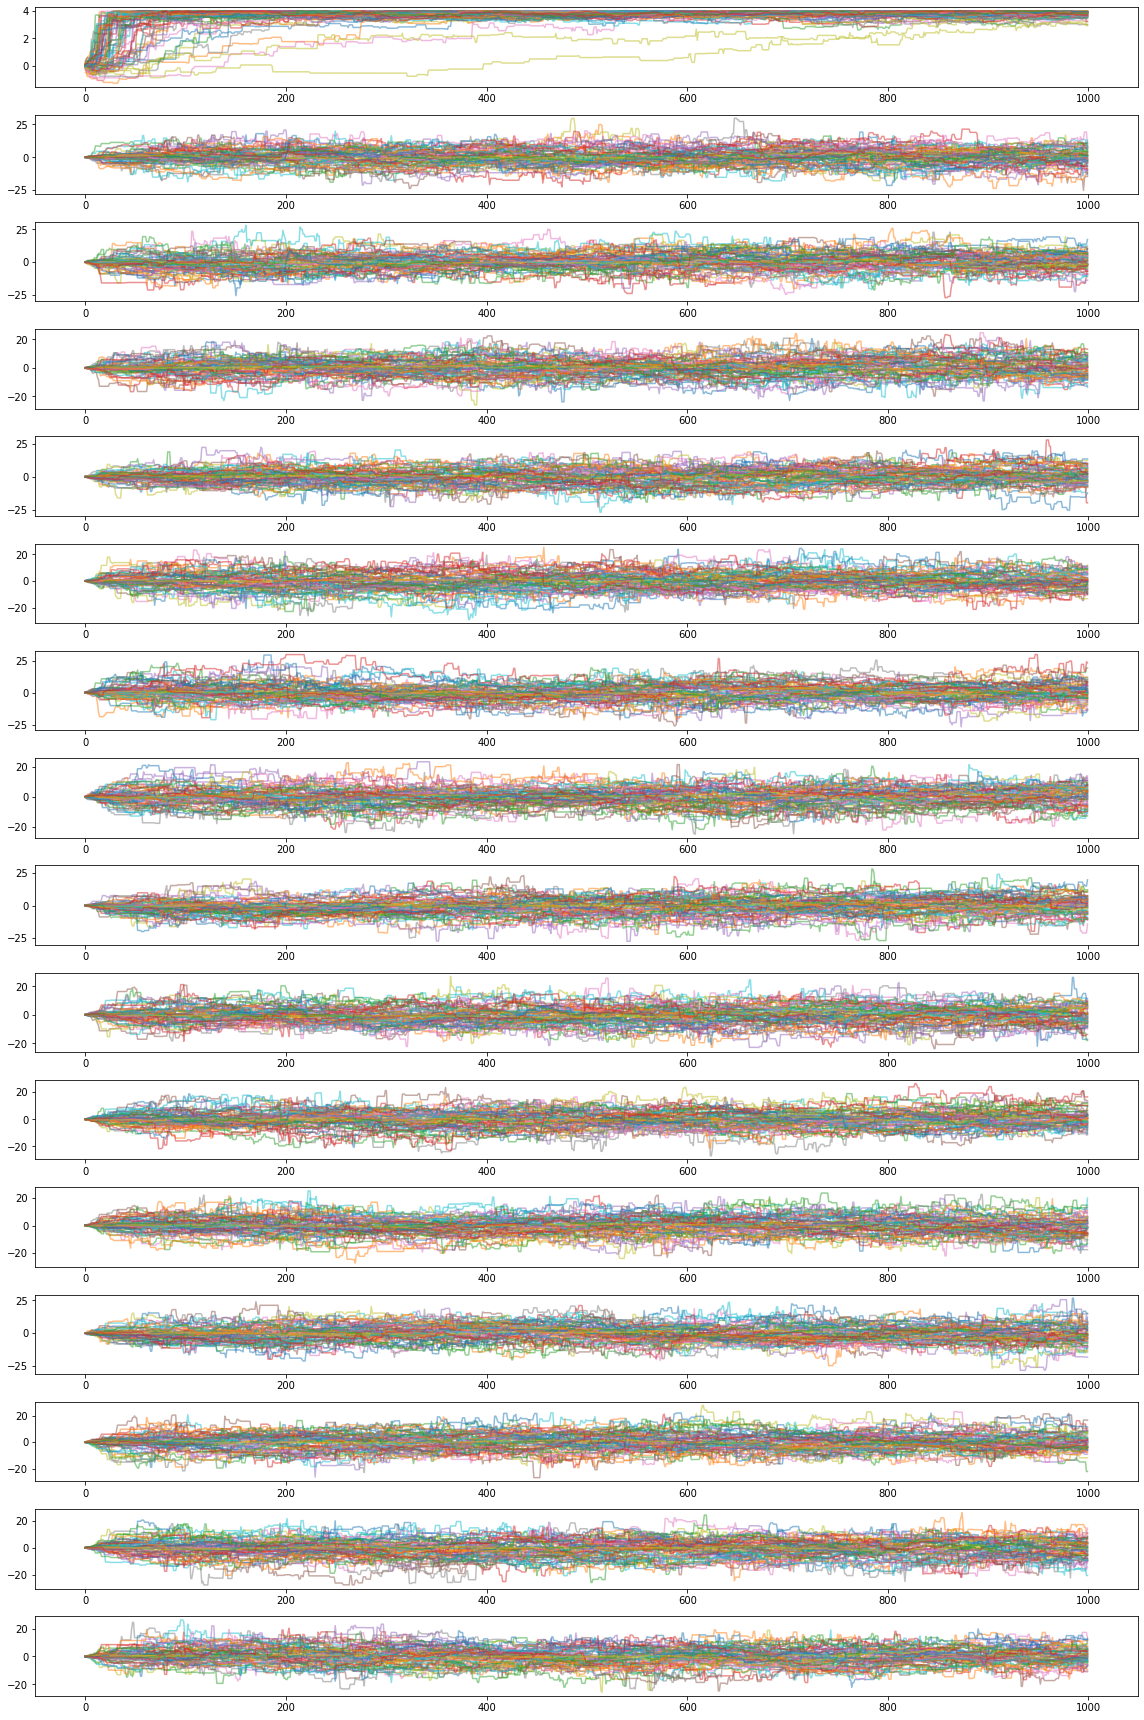

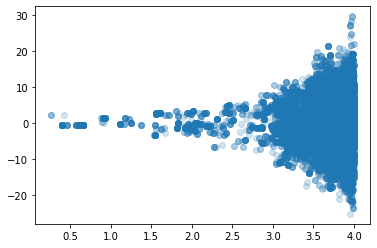

MCMC mean: [ 3.70608049  0.39899494  0.68846939  0.62896534  0.21181538 -0.01802248
  0.29964925 -0.14127283 -0.3058471  -0.16160001 -0.01930687  0.05042515
 -0.6069332   0.07024649 -0.50109873 -0.21746941]
MCMC std: [0.38431139 6.4108901  6.67034553 6.5959592  6.63405505 6.34410234
 6.69634382 6.14505136 6.95822548 6.55253838 6.22053515 6.66136233
 6.49186375 6.39188843 6.82591611 6.30070575]


In [178]:
plt.figure(figsize=(16,1.5*ndim))
for n in range(ndim):
    plt.subplot2grid((ndim, 1), (n, 0))
    plt.plot(np.arange(nsteps),sampler_emcee.chain[:,:,n].T,alpha=0.5)
plt.tight_layout()
plt.show()

trace_emcee = sampler_emcee.chain[:,int(nsteps/2):,:].reshape((-1,ndim),order="F")
plt.scatter(trace_emcee[:,0],trace_emcee[:,1], alpha=0.2)
#plt.xlim(0.0,10)
plt.show()

print('MCMC mean:', np.mean(trace_emcee, axis=0))
print('MCMC std:', np.std(trace_emcee, axis=0))

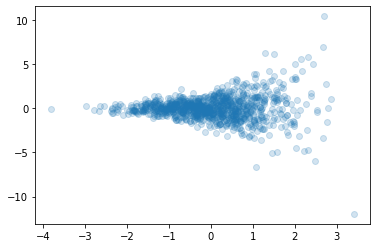

In [179]:
# Independent samples

y = np.random.normal(0.0,1.0,size=nsteps)
x = np.empty((nsteps,ndim-1))
for i in range(nsteps):
    for n in range(ndim-1):
        x[i,n] = np.random.normal(0.0,np.exp(y[i]/2))
        
plt.scatter(y,x.T[0], alpha=0.2)
plt.show()